In [2]:
import pandas as pd

In [3]:
goods_baier=pd.read_excel(r"C:\Users\bin\Desktop\电商综合案例\电商案例数据\拜耳店铺数据\德国拜耳产品评论数据.xlsx")

In [4]:
goods_baier.head()

,产品名称,链接,评论页码,评论,评论日期
0,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一...,2018-11-21 19:01:20
1,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,朋友推荐的说之前用的挺管用的。在放药的前几天就没怎么见蟑螂了，然后出去玩之前把家里角角落落全...,2018-11-23 11:07:03
2,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,真心坑人啊！😂还没到24小时就凝固了！小强依然活跃🤑🤑🤑🤑,2018-11-24 00:28:17
3,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,盆友推荐的，说特别好用，效果杠杠的，看双十一做活动，就买啦，效果应该不错吧，不过尸体都是家里...,2018-11-25 03:07:25
4,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,我是买到假货吗？那么贵的蟑螂药居然还有，还是蟑螂已经百毒不侵了？,2018-11-26 07:49:43


In [5]:
goods_baier.shape

(1400, 5)

## 1、文本的探索与预处理

In [8]:
pd.set_option('display.max_colwidth',500)

In [ ]:
#Q1 此用户没有填写评论! 对舆情分析没有意义
#Q2 有些用户为了获取积分或者金钱奖励，而采取的一种快速手段（复制，一个字出现多次）（j机械词）
#Q3 完全复制别人的评论（用户1与用户20评论一模一样）
#Q4 &hellip

### （1）Q1 此用户没有填写评论! 对舆情分析没有意义

In [12]:
goods_baier1=goods_baier[goods_baier.评论!='此用户没有填写评论!']

In [13]:
goods_baier1.shape

(1300, 5)

### （2） Q2 有些用户为了获取积分或者金钱奖励，而采取的一种快速手段（复制，一个字出现多次）（机械词）

In [17]:
#1、这类情况几乎都出现在开头或者结尾
#2、少量的出现在中间的连续（不做处理，绵绵不断）

In [19]:
# 定义去除前缀重复的函数
def qc_string_forward(s):
    filelist = s
    filelist2 = []
    for a_string in filelist:
        temp1 = a_string.strip('\n')
        temp2 = temp1.lstrip('\ufeff')
        temp3 = temp2.strip('\r')
        char_list = list(temp3) #把字符串转化列表自动按单个字符分词了
        #print(char_list)

        list1 = []
        list1.append(char_list[0])
        list2 = ['']

        #记录要删除的索引
        del1 = []
        i = 0
        while (i<len(char_list)):
            i = i+1
            #这里是对后面没有词汇的时候对列表1和列表2判断一次重复
            if i == len(char_list):
                if list1 == list2:
                    m = len(list2)
                    for x in range(i-m,i):
                        del1.append(x)
            else:

                if char_list[i] == list1[0] and list2==['']:
                    #print('词汇和list1相同，list2为空，将词加入list2')
                    list2[0]=char_list[i] #这里初始化用append会让lisr2初始化为['','**']
                elif char_list[i] != list1[0] and list2==['']:
                    #print('词汇和1不同，2为空，将词加入1')
                    list1.append(char_list[i])

                #触发判断
                elif char_list[i] != list1[0] and list2 !=['']:
                    if list1 == list2 and len(list2)>=2:
                        #print('词和1不同，2不为空，判断1和2重复')
                        m = len(list2)
                        #删除列表2里的内容，列表1本来的内容不用再去判断重复了
                        for x in range(i-m,i):
                            del1.append(x)
                        list1= ['']
                        list2 = ['']
                        list1[0]=char_list[i]
                    else:
                        #print('词和1不同，2不为空，判断1和2不重复')
                        list2.append(char_list[i])

                #触发判断
                elif char_list[i] == list1[0] and list2 != ['']:
                    if list1 == list2:
                        #print('词和1相同，2不为空，判断1和2重复')
                        m = len(list2)
                        #删除列表2里的内容，列表1需要再去和后面的词汇继续判断重复
                        for x in range(i-m,i):
                            del1.append(x)

                        list2 = ['']
                        list2[0]=char_list[i]
                    else:
                        #print('词和1相同，2不为空，判断1和2不重复')
                        #逻辑对书本上进行了修改，书上是清空列表1和2，就是保留现在列表1和2内容不做删除，这里只保留1，列表2内容还需要做对比
                        list1 = list2
                        list2 = ['']
                        list2[0]=char_list[i]


        a = sorted(del1) #从数字更大的索引删起，这样就不用考虑元素删除后索引的变化问题
        t = len(a) - 1
        while(t>=0):
            del char_list[a[t]]
            t = t-1
        str1 = ''.join(char_list)
        str2 = str1.strip()
        filelist2.append(str2)
    return filelist2

In [20]:
# 定义去除后缀重复的函数
def qc_string_backward(s):
    filelist = s
    filelist2 = []
    for a_string in filelist:
        temp1 = a_string.strip('\n')
        temp2 = temp1.lstrip('\ufeff')
        temp3 = temp2.strip('\r')
        temp3=temp3[::-1]
        char_list = list(temp3) #把字符串转化列表自动按单个字符分词了
        #print(char_list)

        list1 = []
        list1.append(char_list[0])
        list2 = ['']

        #记录要删除的索引
        del1 = []
        i = 0
        while (i<len(char_list)):
            i = i+1
            #这里是对后面没有词汇的时候对列表1和列表2判断一次重复
            if i == len(char_list):
                if list1 == list2:
                    m = len(list2)
                    for x in range(i-m,i):
                        del1.append(x)
            else:

                if char_list[i] == list1[0] and list2==['']:
                    #print('词汇和list1相同，list2为空，将词加入list2')
                    list2[0]=char_list[i] #这里初始化用append会让lisr2初始化为['','**']
                elif char_list[i] != list1[0] and list2==['']:
                    #print('词汇和1不同，2为空，将词加入1')
                    list1.append(char_list[i])

                #触发判断
                elif char_list[i] != list1[0] and list2 !=['']:
                    if list1 == list2 and len(list2)>=2:
                        #print('词和1不同，2不为空，判断1和2重复')
                        m = len(list2)
                        #删除列表2里的内容，列表1本来的内容不用再去判断重复了
                        for x in range(i-m,i):
                            del1.append(x)
                        list1= ['']
                        list2 = ['']
                        list1[0]=char_list[i]
                    else:
                        #print('词和1不同，2不为空，判断1和2不重复')
                        list2.append(char_list[i])

                #触发判断
                elif char_list[i] == list1[0] and list2 != ['']:
                    if list1 == list2:
                        #print('词和1相同，2不为空，判断1和2重复')
                        m = len(list2)
                        #删除列表2里的内容，列表1需要再去和后面的词汇继续判断重复
                        for x in range(i-m,i):
                            del1.append(x)

                        list2 = ['']
                        list2[0]=char_list[i]
                    else:
                        #print('词和1相同，2不为空，判断1和2不重复')
                        #逻辑对书本上进行了修改，书上是清空列表1和2，就是保留现在列表1和2内容不做删除，这里只保留1，列表2内容还需要做对比
                        list1 = list2
                        list2 = ['']
                        list2[0]=char_list[i]


        a = sorted(del1) #从数字更大的索引删起，这样就不用考虑元素删除后索引的变化问题
        t = len(a) - 1
        while(t>=0):
            del char_list[a[t]]
            t = t-1
        str1 = ''.join(char_list)
        str2 = str1.strip()
        str2=str2[::-1]
        filelist2.append(str2)
    return filelist2

In [160]:
list_baier=goods_baier1.评论.values.tolist()

#去除前缀重复
res1=qc_string_forward(list_baier)

#去除后缀重复
res2=qc_string_backward(list_baier)

### (3)Q3 完全复制别人的评论（用户1与用户20评论一模一样）

In [28]:
res3=[]
for i in res2:
    if i not in res3:
        res3.append(i)

In [29]:
len(res3)

1265

### (4)Q4 &hellip

## 2、分词

In [30]:
import jieba

### (1)掌握jieba.cut  jieba.lcut

In [34]:
jieba.cut?

In [32]:
jieba.cut('我是中国人')

<generator object Tokenizer.cut at 0x0000015383E7DB88>

In [35]:
for i in jieba.cut('我是中国人',HMM=True):
    print(i)

我
是
中国
人


In [38]:
jieba.lcut('我是中国人',HMM=True)

['我', '是', '中国', '人']

### (2)分词的词性

In [39]:
import jieba.posseg as psg

In [40]:
psg.cut('我是中国人')

<generator object cut at 0x000001538408BA98>

In [ ]:
for i in psg.cut('我是中国人'):
    print(i)
    print(i.flag)#只要词性

In [44]:
#只要名词
for i in psg.cut('我是中国人'):
    if i.flag.startswith('n'):
        print(i)

中国/ns
人/n


### (3)自定义词典

In [45]:
jieba.load_userdict?

In [46]:
jieba.load_userdict(r'C:\Users\bin\Desktop\my_dict.txt')

In [47]:
jieba.lcut('我是中国人',HMM=True)

['我', '是', '中国人']

## 3、词频分析

In [49]:
from wordcloud import WordCloud,STOPWORDS

### (1)分词

In [52]:
res3[0]

'刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一定要管用，一定要管用，准备看下后续效果会继续追加评价。不知道多久才能消灭干净，还在厨房，没法做饭了，都不愿意进去了。有点担心会挥发。看很多人在用也就试试吧。哎哎'

In [53]:
" ".join(jieba.cut(res3[0]))

'刚 收到 ， 家里 厨房 突然 出现 小强 了 ， 看 了 这个 评价 挺 多 挺 好 ， 销量 也 大 ， 赶紧 定 了 三盒 ， 一定 要 管用 啊 一定 要 管用 ， 一定 要 管用 ， 准备 看 下 后续 效果 会 继续 追加 评价 。 不 知道 多久 才能 消灭 干净 ， 还 在 厨房 ， 没法 做饭 了 ， 都 不 愿意 进去 了 。 有点 担心 会 挥发 。 看 很多 人 在 用 也 就 试试 吧 。 哎 哎'

In [56]:
#分词
text=""
for i in res3:
    text=text+" ".join(jieba.cut(i))

In [69]:
jieba.load_userdict(r'C:\Users\bin\Desktop\my_dict.txt')

#处理hellip
text=""
for i in res3:
    te=""
    for j in jieba.cut(i):
        if j !='hellip' and j !='蟑螂' and j !='小强':
            te=te+" "+j
    text=text+" "+te

### (2)词云绘制

In [75]:
#配置词云参数
my_cloud=WordCloud(
background_color='white',
stopwords=STOPWORDS,
font_path="C:/Windows/Fonts/simsun.ttc",
width=1000,
height=500)

In [76]:
#生成词云
my_cloud.generate(text)

In [61]:
#词云的可视化
import matplotlib.pyplot as plt

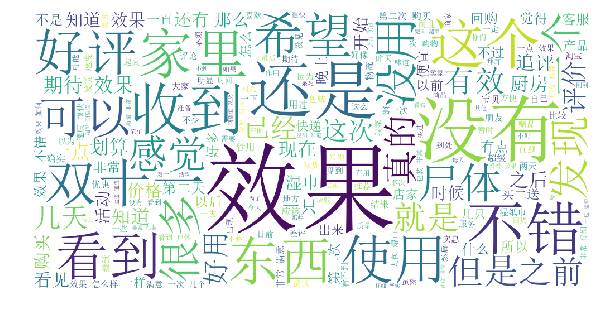

In [77]:
plt.rcParams['figure.figsize']=(10,6)
plt.imshow(my_cloud)
plt.axis('off')
plt.show()

### 知识点（1）如何让图片更清晰

In [79]:
plt.imshow?

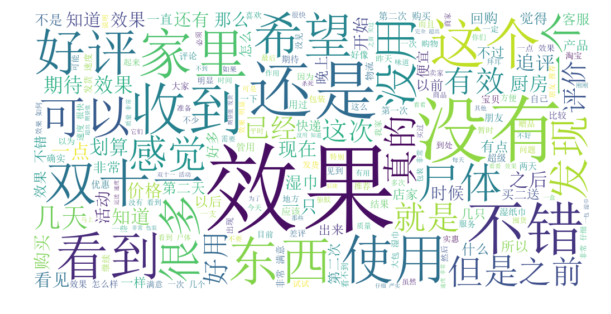

In [80]:
plt.rcParams['figure.figsize']=(10,6)
plt.imshow(my_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### 知识点（2）任意形状的词云图绘制

In [81]:
from PIL import Image
import numpy as np

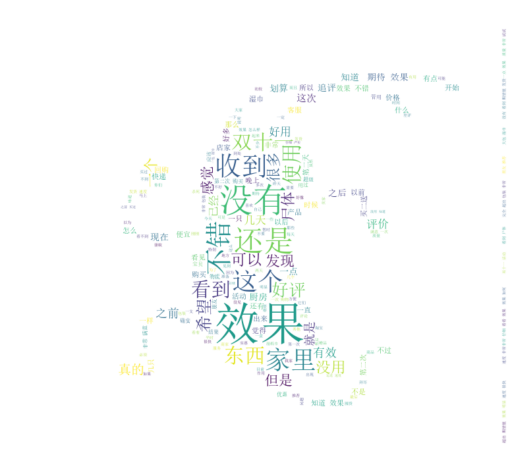

In [90]:
pic=np.array(Image.open("C:/Users/bin/Desktop/电商综合案例/timg.jpg"))

#配置词云参数
my_cloud=WordCloud(
background_color='white',
stopwords=STOPWORDS,
font_path="C:/Windows/Fonts/simsun.ttc",
width=1200,
height=800,
mask=pic)

#生成词云
my_cloud.generate(text)

plt.rcParams['figure.figsize']=(12,8)
plt.imshow(my_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

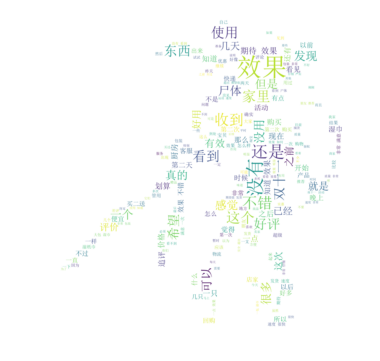

In [91]:
pic=np.array(Image.open("C:/Users/bin/Desktop/电商综合案例/文本分析相关/白底图.jpg"))

#配置词云参数
my_cloud=WordCloud(
background_color='white',
stopwords=STOPWORDS,
font_path="C:/Windows/Fonts/simsun.ttc",
width=1000,
height=500,
mask=pic)

#生成词云
my_cloud.generate(text)

plt.rcParams['figure.figsize']=(10,6)
plt.imshow(my_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### 词云分析方法二：自己计算词频并绘制词云

In [94]:
jieba.load_userdict(r'C:\Users\bin\Desktop\my_dict.txt')

In [113]:
#导人停留词
stopwords=pd.read_table("C:/Users/bin/Desktop/stopwords.txt",quoting=3,names=['stopword'])

In [117]:
stopword_list=stopwords.stopword.values.tolist()

In [125]:
#分词并去除停留词
contents=[]
for i in res3:
    seg=jieba.lcut(i)
    for word in seg:
        if word in stopword_list:
            continue
        elif word==" ":
            continue
        elif word !="hellip" and word !='蟑螂' and word !='小强':
            contents.append(word)   

In [126]:
#计算词频
df_freq=pd.DataFrame({'words':contents})

In [129]:
word_ps=df_freq.words.value_counts()

In [130]:
word_pl=df_freq.words.value_counts(normalize=True)

In [128]:
my_cloud.fit_words?

In [132]:
word_ps.values[0]

589

In [135]:
word_ps.index[0]

'效果'

In [139]:
df_ps=pd.DataFrame({'word':word_ps.index,'value':word_ps.values})

In [144]:
df_ps.values[0]

array(['效果', 589], dtype=object)

In [146]:
word_dict={x[0]:x[1] for x in df_ps.values}

In [151]:
#配置词云参数
my_cloud=WordCloud(
background_color='white',
stopwords=STOPWORDS,
font_path="C:/Windows/Fonts/simsun.ttc",
width=1200,
height=800)

In [152]:
pic_cloud=my_cloud.fit_words(word_dict)

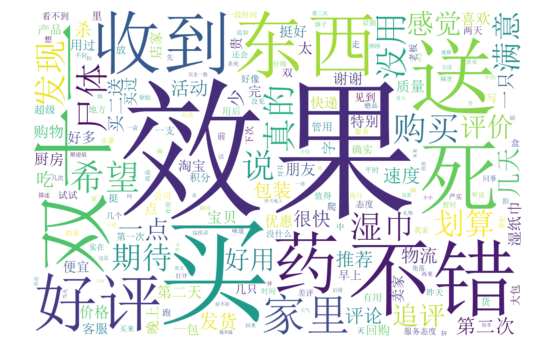

In [153]:
plt.rcParams['figure.figsize']=(10,6)
plt.imshow(my_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## 3、主题特征提取

In [154]:
import jieba.analyse

In [155]:
jieba.analyse.extract_tags?

In [156]:
jieba.analyse.extract_tags(text,topK=10,withWeight=True)

[('效果', 0.24010964543765417),
 ('双十一', 0.11742745705440655),
 ('不错', 0.06289541874742838),
 ('湿巾', 0.06279107078603684),
 ('好评', 0.06050889757297407),
 ('追评', 0.050559044009536154),
 ('非常', 0.04983555033728922),
 ('收到', 0.04920831076461937),
 ('没用', 0.0480659478377749),
 ('划算', 0.042863954162367664)]

In [ ]:
效果 优惠 人为关怀 没用

# 2、科凌虫控舆情

In [157]:
#（1）数据的读取
klck=pd.read_excel(r"C:\Users\bin\Desktop\电商综合案例\电商案例数据\竞争数据\评论舆情数据\科林虫控.xlsx")

In [161]:
klck.shape

(1400, 5)

In [162]:
#（2）文本的预处理
good_klck=klck[klck.评论!='此用户没有填写评论!']
good_klck.shape

(1294, 5)

In [164]:
list_klck=good_klck.评论.values.tolist()
#去除前缀重复
res11=qc_string_forward(list_klck)
#去除后缀重复
res12=qc_string_backward(list_klck)

In [165]:
res13=[]
for i in res12:
    if i not in res13:
        res13.append(i)
len(res13)

1252

In [166]:
#(3)分词
jieba.load_userdict(r'C:\Users\bin\Desktop\my_dict.txt')
#处理hellip
text1=""
for i in res13:
    te=""
    for j in jieba.cut(i):
        if j !='hellip' and j !='蟑螂' and j !='小强':
            te=te+" "+j
    text1=text1+" "+te

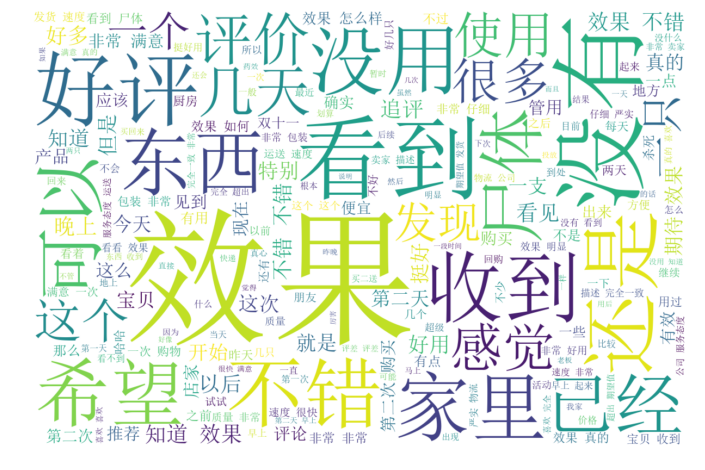

In [168]:
#（4）绘制词云
#配置词云参数
my_cloud=WordCloud(
background_color='white',
stopwords=STOPWORDS,
font_path="C:/Windows/Fonts/simsun.ttc",
width=1200,
height=800)

#生成词云
my_cloud.generate(text1)

plt.rcParams['figure.figsize']=(12,8)
plt.imshow(my_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [169]:
#主题
jieba.analyse.extract_tags(text1,topK=10,withWeight=True)

[('效果', 0.3315756289223415),
 ('不错', 0.12405849911506198),
 ('好评', 0.0887025263280049),
 ('非常', 0.08019085897997362),
 ('收到', 0.07400212272729623),
 ('没用', 0.06483962585515696),
 ('追评', 0.06412035678157918),
 ('看到', 0.0633071167531698),
 ('好用', 0.0580181156307043),
 ('尸体', 0.04990706446308625)]